### Import bibliotek ---> sprawdź proszę, czy są zainstalowane.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

### Rysowanie grafów

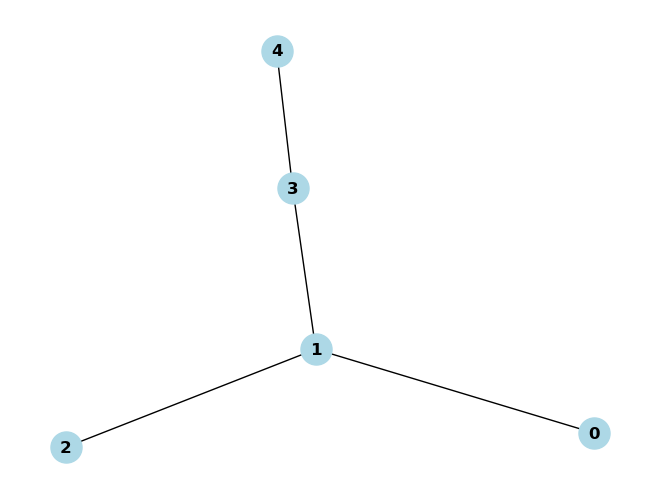

In [2]:
G = nx.Graph()
for i in range(5):
    G.add_node((i), waga = i+2)
for i in range (0,2):
    G.add_edge(i,i+1)
for i in range (1,2):
    G.add_edge(i,i+1)
for i in range(3,4):
    G.add_edge(i,i+1)
    G.add_edge(1,3)
labels = {n: str(n) + ';   ' + str(G.nodes[n]['waga']) for n in G.nodes}
nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

In [3]:
# Tworzenie grafu pzrez funkcję
def T_pqr(p,q,r):
    G = nx.Graph()
    for i in range(p+q+r):
        G.add_node((i), waga = i)
    for i in range (0, p+1):
        G.add_edge(i,i+1)
    for i in range (p,p+q):
        G.add_edge(i,i+1)
    for i in range(p+q+1,p+q+r):
        G.add_edge(i,i+1)
        G.add_edge(p,p+q+1)
    return G

### T_pqr DLA UST. p,q,r o skończonych reprezentacjach

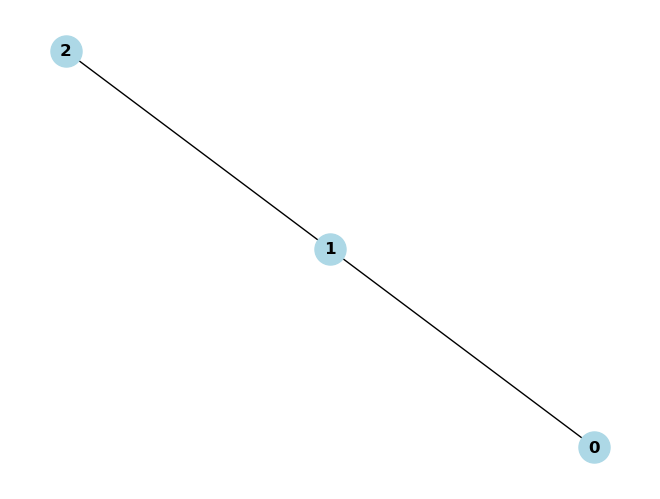

In [4]:
D4 = T_pqr(1,1,1)
nx.draw(D4, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

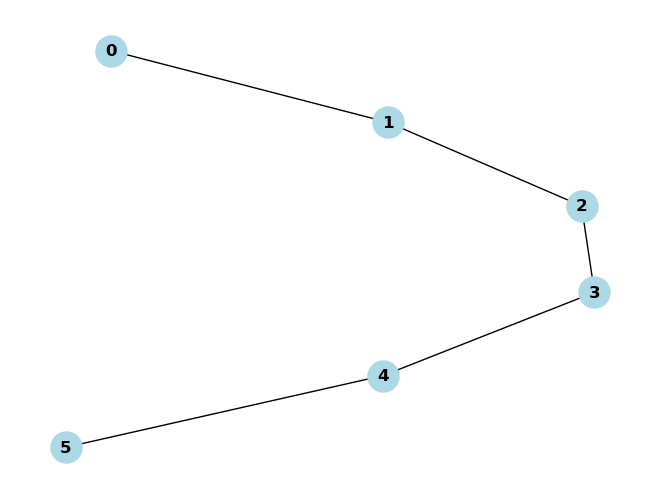

In [5]:
D5 = T_pqr(2,3,0)
nx.draw(D5, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

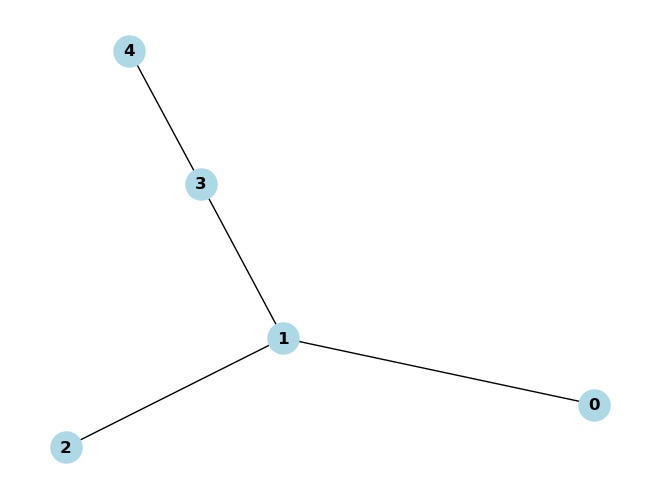

Original nodes: [0, 1, 2, 3, 4]
Relabeled nodes: [2, 0, 3, 4]


In [5]:
E5 = T_pqr(1,1,2)
nx.draw(E5, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

mapping = {0: 2, 1: 0, 2:2, 3: 3, 4: 4, 5: 5}

H = nx.relabel_nodes(E5, mapping)

print("Original nodes:", list(E5.nodes()))
print("Relabeled nodes:", list(H.nodes()))


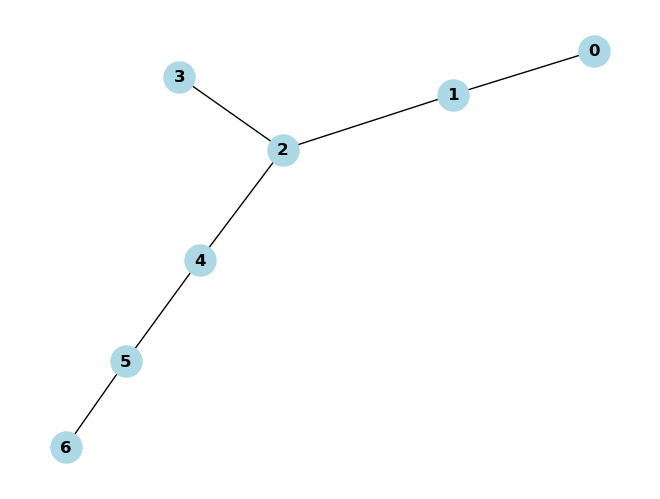

In [7]:
E6 = T_pqr(2,1,3)
nx.draw(E6, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

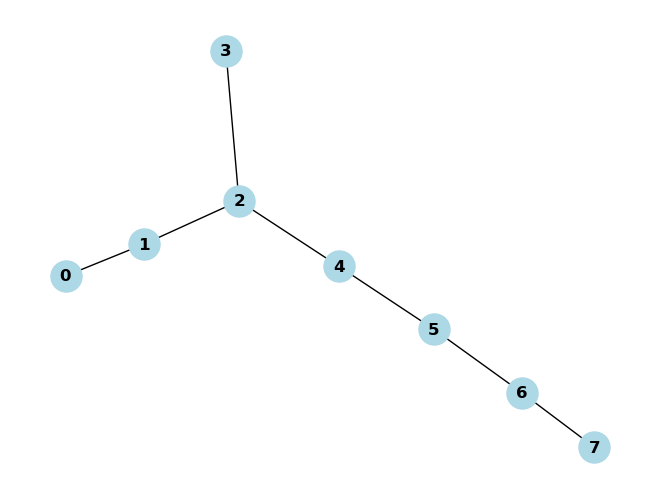

In [8]:
E7 = T_pqr(2,1,4)
nx.draw(E7, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

##### WAGI WIERZCHOŁKÓW

In [9]:
for node, data in E5.nodes(data=True):
    waga = data['waga']
    print(f"Node {node} ma wage {waga}")

Node 0 ma wage 0
Node 1 ma wage 1
Node 2 ma wage 2
Node 3 ma wage 3


KeyError: 'waga'

In [ ]:
# nadpisywanie wag równych ileśtam np 1
initial_waga_values = {node: 1 for node in E5.nodes()}  # For example, initializing all nodes with 'waga' as 0
nx.set_node_attributes(E5, initial_waga_values, 'waga')


In [12]:
#nadpisywanie wag z listy
wagi = [1,-1,1,1,1]
#for idx, waga in enumerate(wagi, start=0):
#    G.add_node(idx, waga= wagi)
def nadawanie_wag(G,  wagi_lista):
    for idx, waga in enumerate(wagi_lista):
        G.add_node(idx, waga=waga)
    
    for node, data in G.nodes(data=True):
        waga = data['waga']
        print(f"Node {node} ma wage {waga}")

In [13]:
nadawanie_wag(E5, wagi)

Node 0 ma wage 1
Node 1 ma wage -1
Node 2 ma wage 1
Node 3 ma wage 1
Node 4 ma wage 1


In [ ]:
#definiowanie grafu do dalszych obliczeń, zamiast p,q,r, wpisuj wartości liczbowe
#G = nx.Graph()
#for i in range(p+q+r):
#    G.add_node((i), waga=i)
#for i in range (0,p+1):
#    G.add_edge(i,i+1)
#for i in range (p,p+q):
#    G.add_edge(i,i+1)
#for i in range(p+q+1,p+q+r):
#    G.add_edge(i,i+1)
#    G.add_edge(p,p+q+1)
#nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
#plt.show()


In [ ]:
nowe_wagi = [1,1,-1,1,1]

In [ ]:
nadawanie_wag(E5, nowe_wagi)

### MAPPINGI WIERZCHOŁKÓW

In [ ]:
mapping = {0: 2, 1: 3, 2: 4, 3: 5, 4: 0}

H = nx.relabel_nodes(G, mapping)

print("Original nodes:", list(G.nodes()))
print("Relabeled nodes:", list(H.nodes()))

print("Edges in the graph:", H.edges())

labels = {n: G.nodes[n]['waga'] for n in G.nodes}
nx.draw(H, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

In [ ]:
#automatyczny mapping dodający do wierzchołka 1
def mapping(graph):
    mapping = {node: i+1 for i, node in enumerate(graph.nodes())}
    return mapping
mapping(G)

In [ ]:
#automatyczny mapping mnożący wierzchołek razy 2
def mapping(graph):
    mapping = {node: 2*i for i, node in enumerate(graph.nodes())}
    return mapping
mapping(G)

In [ ]:
for idx, (u, v) in enumerate(H.edges(), start=1):
    print(f"Edge {idx}: ({u}, {v})")

In [ ]:
###operacja r_v(hat{(T_pqr)}

In [ ]:
#numeracja wierzchołków z listy do dokończenia
#l_w = [10, 20, 30, 40]
#J.add_nodes_from(l_w)
#nx.draw(J, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
#plt.show()


### Odbicie

In [15]:
def odbicie(G, node):

    neighbors = list(G.neighbors(node))
    
    nowa_waga1 = - G.nodes[node]['waga']
    G.nodes[node]['waga'] = nowa_waga1
            
    for neighbor in neighbors:
        nowa_waga = G.nodes[neighbor]['waga'] -  G.nodes[node]['waga']
        G.nodes[neighbor]['waga'] = nowa_waga
    for node, w in G.nodes(data='waga'):
        print(f"Wierzchołek {node} has weight: {w}")
    #node_weights = {node: G.nodes[node]['waga'] for node in G.nodes()}
    #plt.figure(figsize=(6, 4))
    #pos = nx.spring_layout(G)  # You can change the layout algorithm as needed
    #nx.draw(G, pos, labels=  node_weights)
    #plt.title(f"Iteration: {count}")
    #plt.show()


In [16]:
odbicie(E5, 1)

Wierzchołek 0 has weight: 0
Wierzchołek 1 has weight: 1
Wierzchołek 2 has weight: 0
Wierzchołek 3 has weight: 0
Wierzchołek 4 has weight: 1


### ORBITY

In [14]:
#### iteruje tak: 0,1,2,3,4,...ostatni_wierzchołek, ,0,1,2,3,4....
def autom1(G):
    for node in G.nodes():
        odbicie(G, node)
        node_weights = {node: G.nodes[node]['waga'] for node in G.nodes()}
        #for node, w in G.nodes(data='waga'):
         #   print(f"Wierzchołek {node} has weight: {w}")
            #print(f"Aplikuję odbicie do wierzchołka:{node}")
        #plt.figure(figsize=(6, 4))
        #pos = nx.spring_layout(G) 
        #nx.draw(G, pos, labels=  node_weights)
        #plt.show()
        return odbicie(G, node)

In [95]:
def autom2(G):
    node_weights = {}
    for node in G.nodes():
        odbicie(G, node)
        node_weights[node] = G.nodes[node]['waga']
    return node_weights

In [96]:
autom2(E5)

Wierzchołek 0 has weight: 0
Wierzchołek 1 has weight: 0
Wierzchołek 2 has weight: 2
Wierzchołek 3 has weight: 1
Wierzchołek 4 has weight: 0
Wierzchołek 0 has weight: 0
Wierzchołek 1 has weight: 0
Wierzchołek 2 has weight: 2
Wierzchołek 3 has weight: 1
Wierzchołek 4 has weight: 0
Wierzchołek 0 has weight: 0
Wierzchołek 1 has weight: 2
Wierzchołek 2 has weight: -2
Wierzchołek 3 has weight: 1
Wierzchołek 4 has weight: 0
Wierzchołek 0 has weight: 0
Wierzchołek 1 has weight: 3
Wierzchołek 2 has weight: -2
Wierzchołek 3 has weight: -1
Wierzchołek 4 has weight: 1
Wierzchołek 0 has weight: 0
Wierzchołek 1 has weight: 3
Wierzchołek 2 has weight: -2
Wierzchołek 3 has weight: 0
Wierzchołek 4 has weight: -1


{0: 0, 1: 0, 2: -2, 3: -1, 4: -1}

In [17]:
lista_wierzcholkow = [2,4,1,3,2,4]

def apply_operations_specific_order(G, node_order):
    for node in node_order:
        odbicie(G, node)
        for node, w in G.nodes(data='waga'):
            print(f"Wierzchołek {node} has weight: {w}")
            #print(f"Aplikuję odbicie do wierzchołka:{node}")
       # node_weights = {node: G.nodes[node]['waga'] for node in G.nodes()}
       # plt.figure(figsize=(6, 4))
       # pos = nx.spring_layout(G) 
       # nx.draw(G, pos, labels=node_weights)
       # plt.show()

In [18]:
apply_operations_specific_order(E5, lista_wierzcholkow)

Wierzchołek 0 has weight: 0
Wierzchołek 1 has weight: 1
Wierzchołek 2 has weight: 0
Wierzchołek 3 has weight: 0
Wierzchołek 4 has weight: 1
Wierzchołek 0 has weight: 0
Wierzchołek 1 has weight: 1
Wierzchołek 2 has weight: 0
Wierzchołek 3 has weight: 0
Wierzchołek 4 has weight: 1
Wierzchołek 0 has weight: 0
Wierzchołek 1 has weight: 1
Wierzchołek 2 has weight: 0
Wierzchołek 3 has weight: 1
Wierzchołek 4 has weight: -1
Wierzchołek 0 has weight: 0
Wierzchołek 1 has weight: 1
Wierzchołek 2 has weight: 0
Wierzchołek 3 has weight: 1
Wierzchołek 4 has weight: -1
Wierzchołek 0 has weight: 1
Wierzchołek 1 has weight: -1
Wierzchołek 2 has weight: 1
Wierzchołek 3 has weight: 2
Wierzchołek 4 has weight: -1
Wierzchołek 0 has weight: 1
Wierzchołek 1 has weight: -1
Wierzchołek 2 has weight: 1
Wierzchołek 3 has weight: 2
Wierzchołek 4 has weight: -1
Wierzchołek 0 has weight: 1
Wierzchołek 1 has weight: 1
Wierzchołek 2 has weight: 1
Wierzchołek 3 has weight: -2
Wierzchołek 4 has weight: 1
Wierzchołek 0

### Automaty połączone

In [19]:
lista_wierzcholkow = [1,2,3,4]

In [ ]:
### To działa tak: definiujemy listę L=[x_1,x_2,...,x_n]
### program bierze x_1 oraz zwraca wszelkie możliwe odbicia w x_1
## potem bierze x_2 i tak rekurencyjnie
def combined_function(G, node_order, index):
    node = node_order[index]
    odbicie(G, node)
    #for node, w in G.nodes(data='waga'):
     #   print(f"Wierzchołek {node} has weight: {w}")
    
    if index == 0:
        autom1(G)
        index +=1
    combined_function(G, node_order, index + 1)

In [ ]:
def combined_function(G, node_order, index):
    if index < len(node_order):  
        node = node_order[index]
        odbicie(G, node)

        if index == 0:
            autom1(G)
        combined_function(G, node_order, index + 1)

In [ ]:
combined_function(E5, lista_wierzcholkow, index = 0)

In [ ]:
def combined_function2(G, node_order, index):
    node = node_order[index]
    odbicie(G, node)
    for node, w in G.nodes(data='waga'):
        print(f"Wierzchołek {node} has weight: {w}")
    
    if index == 0:
        node_weights = {node: G.nodes[node]['waga'] for node in G.nodes()}
        for node, w in G.nodes(data='waga'): 
            while w> 0:
                autom1(G)
              #  index +=1
            break
    combined_function2(G, node_order, index +1)

In [ ]:
combined_function2(E5, lista_wierzcholkow, index =0)

### Eliminacja minusów

In [20]:
def pozytywne(G):
    for node, w in G.nodes(data='waga'):
        if w is not None and w < 0:
            return False
    return True

In [21]:
pozytywne(E5)

False

In [48]:
nowe_wagi = [1,2,-3,-2,-1]

In [71]:
nadawanie_wag(E5, nowe_wagi)

Node 0 ma wage 1
Node 1 ma wage 2
Node 2 ma wage -3
Node 3 ma wage -2
Node 4 ma wage -1


In [101]:
def ro_1(G):    
    for node, data in G.nodes(data='waga'):
        G.nodes[node]['waga'] -= 1
    for node, w in G.nodes(data='waga'):
        print(f"{node} ->: {w}")

In [98]:
ro_1(E5)

NameError: name 'ro_1' is not defined

In [ ]:
ro_2(E5)

In [109]:
def zmiana(G):
    nodes_z_odbiciem = set()
    while not pozytywne(G):
        for node, data in G.nodes(data='waga'):
            if data < 0:
                odbicie(G, node)
                nodes_z_odbiciem.add(node)
        for node, w in G.nodes(data='waga'):
            print(f"{node} -> {w}")

In [72]:
def zmiana2(G, count = 0):
    nodes_z_odbiciem = list()
    
    while True: 
        nodes_ujemne = [node for node, data in G.nodes(data='waga') if data < 0]
        
        if not nodes_ujemne:
            break
        
        for node in nodes_ujemne:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
            count +=1
        for node, w in G.nodes(data='waga'):
            print(f"{node} -> {w}")
    print(f"Wierzchołki w kolejności wywoływania:", nodes_z_odbiciem, count)

In [108]:
### zapisz na wektorach te wagi
# wypisz teżwagi, od których zaczynamy
# omijanie miejsc minusów

In [87]:
lista = [[2, 3, 4, 1, 3, 0, 1, 4, 0, 2, 1, 3]]

1


In [ ]:
def ro_2(G):
    for node, data in G.nodes(data= 'waga'):
        G.nodes[node]['waga'] +=1
    for node, w in G.nodes(data='waga'):
        print(f"Wierzchołek {node} has weight: {w}")

### Relacje Knutha

In [36]:
def relations(tableau):
    rows, cols = tableau.shape
    for i in range(rows):
        for j in range(cols - 1):
            if tableau[i, j] > tableau[i, j + 1]:
                tableau[i, j], tableau[i, j + 1] = tableau[i, j + 1], tableau[i, j]

    for i in range(rows - 1):
        for j in range(cols):
            if j == 0 and tableau[i, j] > tableau[i + 1, j]:
                tableau[i, j], tableau[i + 1, j] = tableau[i + 1, j], tableau[i, j]
            elif tableau[i, j] > tableau[i + 1, j] and tableau[i, j - 1] < tableau[i + 1, j]:
                tableau[i, j], tableau[i + 1, j] = tableau[i + 1, j], tableau[i, j]
    
    return tableau

### Kanoniczne bazy

In [89]:
def wiersze_relacje(tableau):
    for row in tableau:
        for i in range(len(row)-1):
            if row[i] > row[i + 1]:
                row[i], row[i + 1] = row[i + 1], row[i]
    return tableau

In [91]:
wiersze_relacje(lista)

[[1, 2, 0, 1, 3, 0, 2, 1, 3, 3, 4, 4]]

In [100]:
#def usuwanie(lista):    
 #   T = []
  #  for idx in lista[]:
   #     if lista[] - lista[+1] /=0:
    #        T.append(lista[])
    #return T